# **Segmentazione Tramite Sogliatura in scala di Grigi e Analisi dei Colori HSV**
***

Giuseppe Perricone (S5581676) <br>
In caso serva, ecco link al repository di GitHub contentente il progetto: --> [LINK](https://github.com/GiuuGpEEp/TerzoAnnoUni/blob/main/FESI/Progetto/Presentazione.ipynb)

Collabolatori: 
- Nocco Sofia (S5589706)
- Ho sfruttato chatGPT unicamente per l'implementazione del codice, dal momento che non ho mai lavorato in python

## **Introduzione e Obiettivo** 

Dato il seguente dataset di immagini l'obiettivo dell'esperienza è quello di segmentare delle cellule di malaria; "separando" quindi le cellule dalla malattia.
Anticpo che i due approcci da me utilizzati sono:
1. Segmentazione lavorando in scala di grigi, e sfruttando una sogliatura (vedere sezione relativa al **metodo 1**)
2. Segmentazione lavorando in HSV e sfruttare questo spazio di colore per rimuovere le aree con tonalità simile a viola (vedere sezione relativa al **metodo 2**)

![Dataset](Dataset.png) 

### Cos'è. E cosa rende una segmentazione ottimale?
La segmentazione è un processo in cui un'immagine digitale viene divisa in diverse regioni, ognuna delle quali rappresenta un oggetto o una parte di esso presente nell'immagine stessa. Una segmentazione è considerata "buona" quando soddisfa i seguenti criteri:
- Tutti i pixel all'interno di una stessa regione dovrebbero avere **caratteristiche simili** (colore, intensità, texture) tra loro.
- Le **regioni vicine fra loro** dovrebbero essere **più diverse possibile**, in modo da evidenziare i confini degli oggetti.
- Il risultato della segmentazione dovrebbe essere abbastanza coerente con il nostro modo di percepire le varie sezioni dell'immagine.

In sostanza una segmentazione è buona quando si riesce bene a distinguere, e separare le diverse regioni di interesse in un'immagine.

## **Metodi**
Per raggiungere l'obiettivo finale ho effettuato un'analisi del dataset, con lo scopo di identificare le possibili difficoltà e i differenti metodi di approccio. <br> Dopo aver fatto ciò ho implementato due algoritmi differenti.

#### **Analisi Del Dataset - Osservazioni**
Come si può vedere vi è un gran numero di cellule che differiscono l'una dall'altra sia dalla dimensione, sia dal colore, sia dalla forma. Inoltre in quasi tutte le immagini sono visibili alcuni artefatti che confondono un po' la visione della cellula: <br> <br>
un esempio di **artefatti** possono essere alcune piccole macchie, che tuttavia sono di colore differente dalla malattia, quindi non si riesce a comprendere bene cosa siano, oppure anche lo sfondo stesso. La problematica principale di questi artefatti è che quest'ultimi potrebbero essere rimossi come parte della malattia, oppure influenzare in modo negativo la segmentazione.<br>
Ciò che si può fare è quindi sfruttare delle tecniche appropriate di pre-processing (link: cos'è il pre-processing) per filtrare correttamente le informazioni. Per esempio io durante l'analisi ho ignorato i pixel dello sfondo.

La **colorazione** delle singole cellule verrà analizzata meglio in seguito, sfruttando degli istogrammi, tuttavia possiamo già affermare con certezza che: la differenza di colore tra le varie cellule è un problema, nel caso si voglia sfruttare un algoritmo di segmentazione che fa affidamento, sull'utilizzo di una soglia fissa per identificare il colore della malattia. Posso affermare ciò perchè è proprio quello che mi è successo durante l'uso del primo metodo di segmentazione che ho provato a implementare (link al segnalibro del notebook quando avrò inserito quella parte). <br> <br>

La **dimensione** e la **forma** delle singole cellule può invece costituire un problema per algoritmi che fanno uso di forme geometriche, o comunque di identificazione dei contorni.<br>
Infatti identificare i contorni della cellula, e anche della malattia, potrebbe risultare molto complesso proprio a causa del fatto che le cellule non sono di dimensioni e forme simili fra loro, inoltre vi sono alcune immagini dove l'area della malattia non è proprio ben definita. 

(Nella sezione esperimenti se si vuole vedere l'analisi sono presenti gli istogrammi).

<h4  id="id-metodo1"> <b> Metodo 1 - Segmentazione tramite sogliatura lavorando in scala di grigi </b> </h4> 

Prendendo ispirazione da uno dei [link](https://medium.com/@flcamarao/image-processing-using-python-image-segmentation-98d2ebe44bfe) forniti per il progetto, ho scelto di implementare questo metodo perchè lavorare con un'immagine in scala di grigi mi permette di ridurre la complessità rispetto alle immagini a colori. <br> Infatti a differenza di quest'ultime le immagini in scala di grigi posseggono un solo canale, a differenza dei 3 presenti nello spazio RGB. Di conseguenza ciò mi permette di avere un focus maggiore solo su determinate aree dell'immagine, anche se ciò potrebbe portare anche ad una perdita di dettagli. Quest'aspetto in particolare sulla perdita di dettagli non è per forza da considerare come aspetto negativo: <br>
delle volte, sopratutto nelle immagini con una forte quantità di rumore, può essere utile andare a perdere delle informazioni. <br>

Dopo aver convertito l'immagine in scala di grigi ho scelto di effettuare una sogliatura, ques'ultima permette di seperare oggetti dallo sfondo, basandosi sull'utilizzo di una soglia, e sui valori dei pixel dell'immagine. ecco come funziona: <br>
Imposto un valore soglia 𝑇. I pixel dell'immagine vengono in seguito confrontati con 𝑇:
- Se il valore di intensità di un pixel è maggiore o uguale a 𝑇, il pixel diventa bianco (o nero) <br>
- Se il valore di intensità di un pixel è minore di 𝑇, il pixel diventa nero (o bianco).
<br> 

Questo processo trasforma l'immagine originale in una immagine binaria, con due soli valori, ovvero 0 e 1  (nero e bianco). <br>

Ho scelto di effettuare queste due operazioni assieme perchè: tramite la scala di grigi vengono messe in evidenza le differenze tra gli oggetti che mi interessa segmentare, (nel nostro caso la malattia) e lo sfondo (nel nostro caso la cellula), ciò permette quindi di rendere la sogliatura molto più precisa. <br>
Inoltre inizialmente ho scelto questo approccio perchè è un algoritmo indipendente dallo studio dei colori dell'immagine, quindi potenzialmente può funzionare indipendentemente dai colori della malattia e della cellula (ovviemente questi due oggetti devono avere intensità di pixel differenti altrimenti non funziona).

#### Passi dell'algoritmo:
1. Ridimensionamento dell'immagine, in modo tale che tutte le immagini posseggano le stesse dimensioni
2. Conversione dell'immagine in scala di grigi
3. Applico una prima sogliatura con l'obiettivo di rimuovere lo sfondo nero --> i pixel che hanno un valore maggiore di 0 (nero) vengono impostati come bianchi, in questo modo ricavo una maschera che applico all'immagine originale per rimuovere lo sfondo
4. Eseguo un miglioramento del contrasto sull'immagine risultante (in scala di grigi), tramite equalizzazione dell'istogramma. Quest'ultima mi consente di effettuare una sogliatura ancora più precisa, dal momento che l'equalizzazione rende più uniforme i valori dell'istogramma, in questo modo diciamo che vengono distribuiti in maniera più omogenea i livelli di grigio in tutta l'immagine. Di conseguenza le zone scure diventano più scure e le zone chiare più chiare, aumentando la differenza tra le due. In questo modo i bordi tra le diverse regioni dell'immagine diventano più definiti, facilitando la loro individuazione tramite sogliatura. Tuttavia può anche capitare che, in presenza di rumore, l'equalizzazione dell'istogramma vada rendere questo rumore ancora più evidente peggiorando quindi la situazione (questo è ciò che succede in alcune immagini).
5. Eseguo la sogliatura sull'immagine risultante dal miglioramento del contrasto, in modo tale da ottenere la maschera che poi applicherò all'immagine.
6. Effettuo delle operazioni di EROSIONE e Dilatazione, con l'obiettivo di pulire la maschera e di renderla ancora più precisa, rimuovendo il rumore ([link](https://medium.com/@jaskaranbhatia/exploring-image-segmentation-techniques-watershed-algorithm-using-opencv-9f73d2bc7c5a) da cui ho visto cosa sono le operazioni di erosione e dilatazione, punto 2 sul sito.)
7. Applico la maschera risultante all'immagine

Per vedere bene l'applicazione dell'algoritmo passo dopo passo andare nella sezione **Esperimenti**.<br>

Le considerazioni finali su questo metodo, incluso il valore di soglia scelto, sono presenti nella sezione **Approfondimenti**

<h4 id="id-metodo2"> <b> Metodo 2 - Segmentazione in spazio di colori HSV</b> </h4>

Siccome non mi hanno soddisfatto particolarmente i risultati ottenuti con il metodo precedente ho scelto di implementarne un secondo, basato su uno spazio di colore totalmente diverso, ovvero HSV. <br>    
L'idea di questo algoritmo nasce dall'analisi degli istogrammi delle immagini. Infatti, come possibile osservare nella prossima sezione, le tonalità principali delle cellule sono ottenute da una combinazione di colori che prevede principalmente l'uso del rosso e del blu. <br>
Di conseguenza possiamo affermare che il colore della malattia in tutte le cellule ha una tonalità che varia dal rosa al viola, ma non fuoriesce mai da questo range di valori. <br>
Ho quindi pensato di sfruttare questa caratteristica per implementare un algoritmo in HSV che permetta di filtrare l'immagine basandosi sul livello di saturazione di alcune tonalità di viola, in modo tale da rimuovere le tracce di malattia dalla cellula.

L'implementazione completa dell'algoritmo è presente nella sezione **esperimenti**, mentre le considerazioni finali sono presenti in **Approfondimenti**

<h2  id="id-esperimenti"> <b> ESPERIMENTI - Codice degli algoritmi </b> </h2> 

Questa sezione del notebook è riservata per le prove più "pratiche". Importo quindi le librerie che serviranno per l'esecuzione del codice:



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage import measure, morphology
import os #per poter prendere le immagini nella cartella di input e iterare 

<h4  id="id-istogrammi"> Analisi del Dataset - Analisi Degli Istogrammi </h4> 

Come annunciato precedentemente parte dell'analisi che ho fatto sul dataset è relativa alla parte di analisi del colore delle immagini tramite istogrammi, in modo tale da capire se vi fosse qualche effettiva similitude tra le colorazioni delle varie immagini. <br>
Ovviamente non stampare gli istogrammi di tutte 150 le immagini, di conseguenza effettuo una sorta di campionamento prendendo solo alcune immagini che avranno il compito di "rappresentare" tutte le immagini simili a quest'ultima.
Le immagini scelte sono:
- (1) 
- (14)
- (26)
- (86)
- (94)
- (110)
- (139)

Ora che ho scelto le immagini ne calcolo gli istogrammi per analizzare la distribuzione del colore all'interno dei 3 canali RGB. **Non prendo in considerazione il colore dello sfondo**


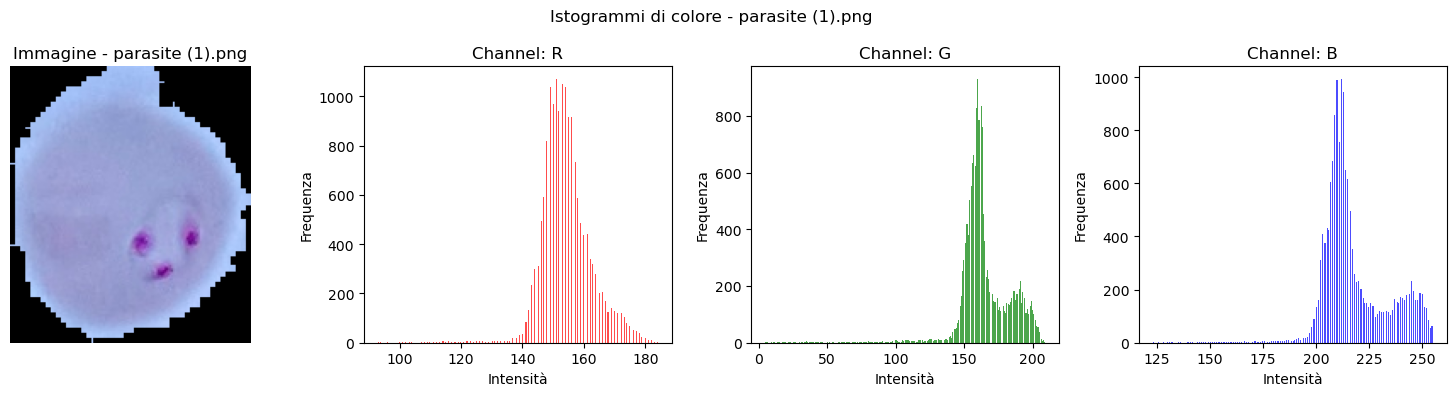

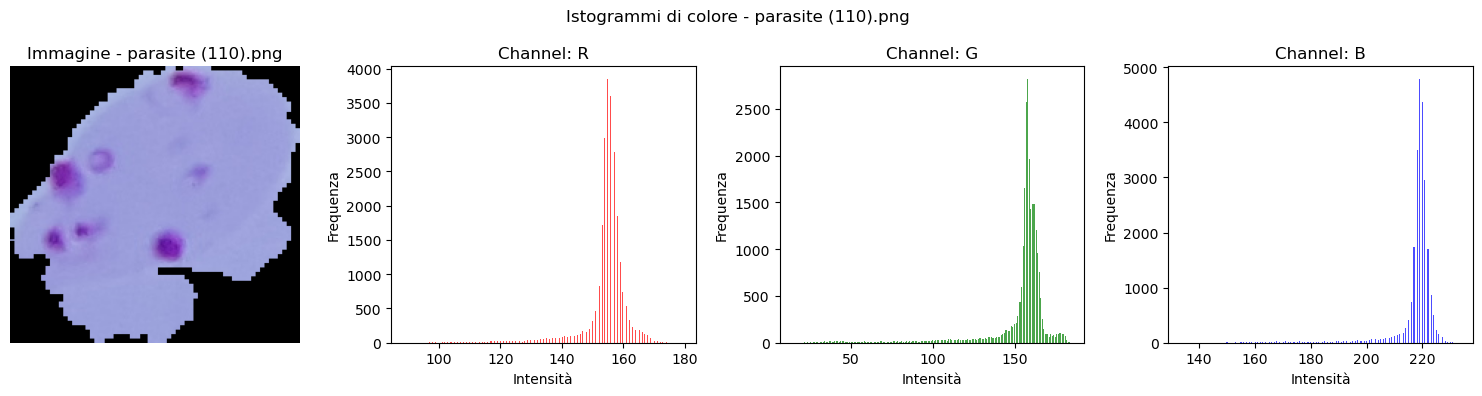

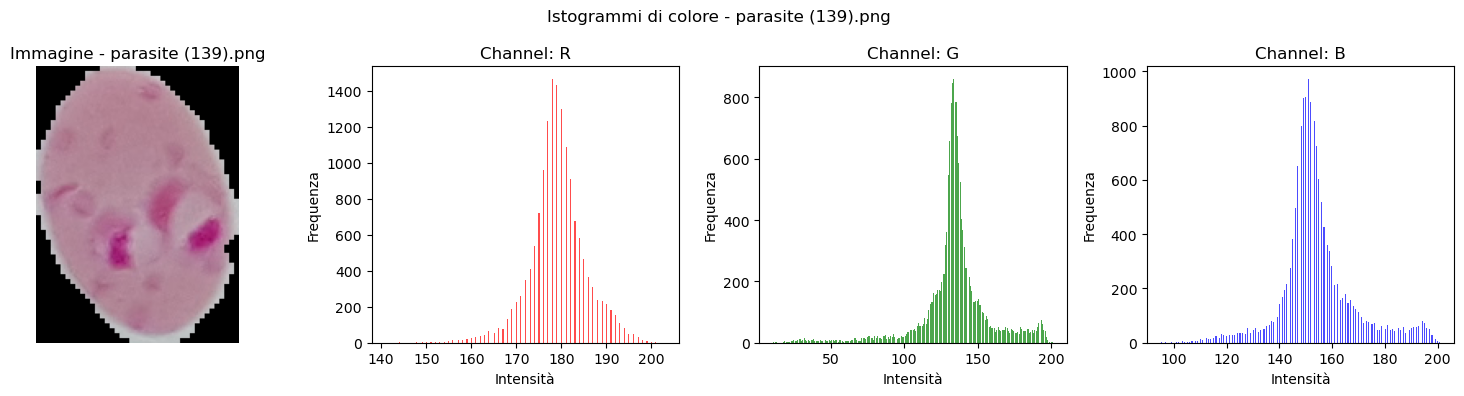

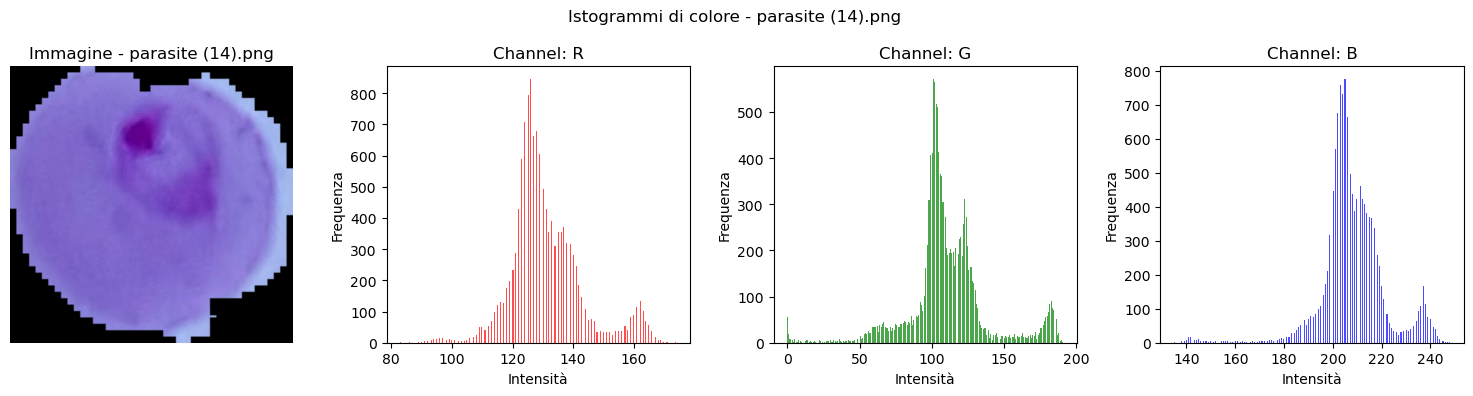

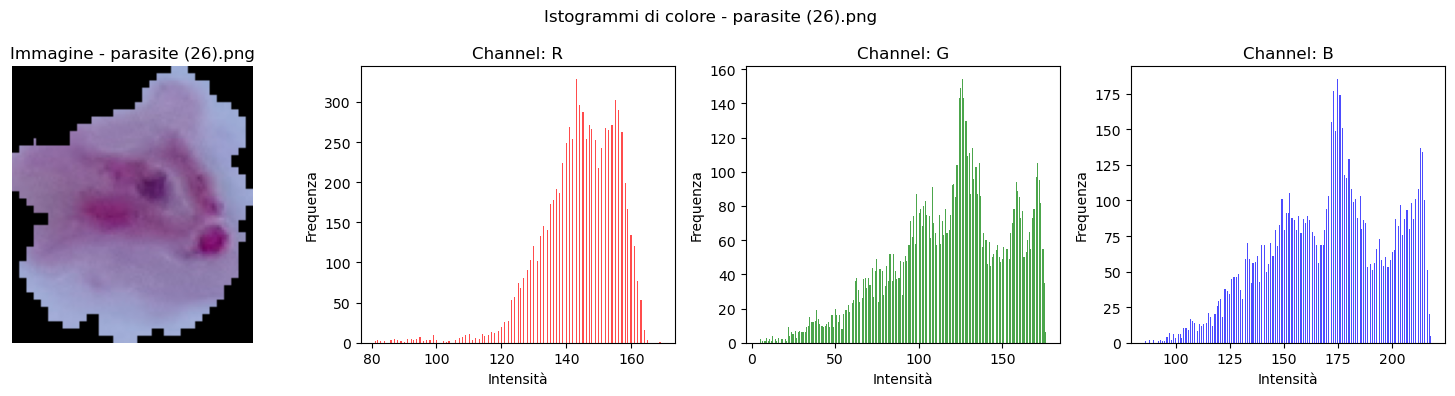

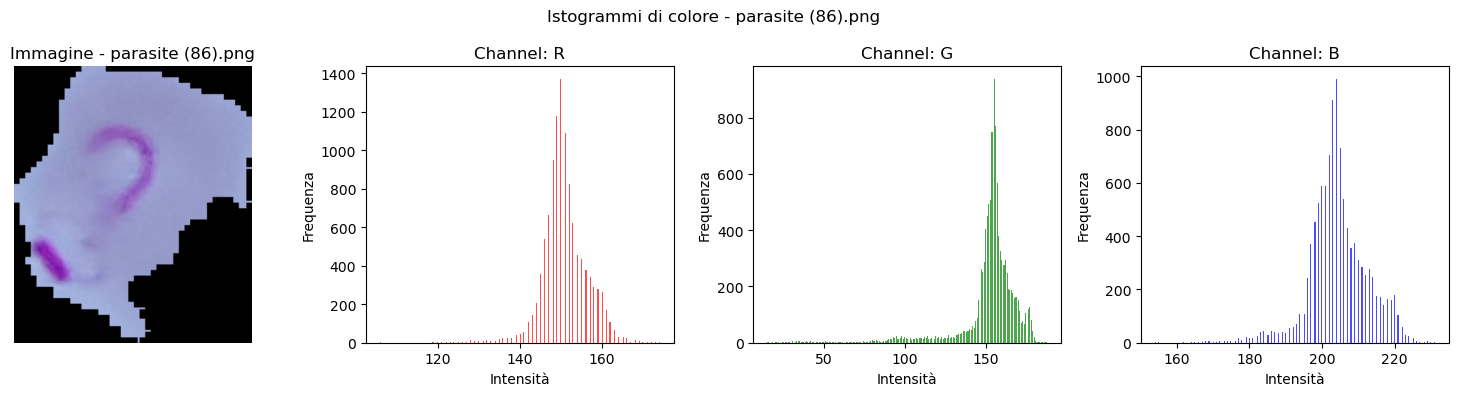

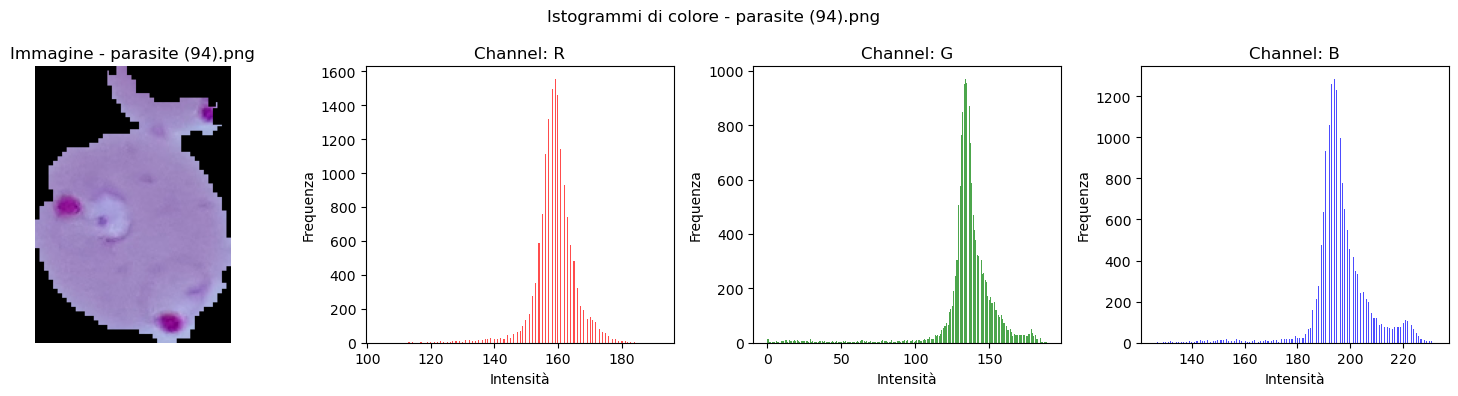

In [9]:
input_folder = 'FESI/Progetto/ImmaginiCampioni'
color_channels = ('R', 'G', 'B')

for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg'): 
        input_path = os.path.join(input_folder, filename)
        
        image = cv2.imread(input_path)
        img_array = np.array(image)
        
        # Maschera per escludere i pixel neri (valori RGB = [0, 0, 0])
        non_black_mask = np.any(img_array > 0, axis=2)
        
        plt.figure(figsize=(15, 4))
        plt.subplot(1, 4, 1)
        plt.imshow(image)
        plt.title(f"Immagine - {filename}")
        plt.axis('off')  
        
        for j, color in enumerate(color_channels):    
            # Applico la maschera per escludere i pixel neri
            channel_values = img_array[:, :, j][non_black_mask].flatten()
            
            plt.subplot(1, 4, j + 2)
            plt.hist(channel_values, bins=256, color=color.lower(), alpha=0.7)
            plt.title(f"Channel: {color}")
            plt.xlabel("Intensità")
            plt.ylabel("Frequenza")
        
        plt.suptitle(f"Istogrammi di colore - {filename}")
        plt.tight_layout()
        plt.show()

Grazie a questa analisi degli istogrammi si può notare che, le tonalità principali delle cellule sono ottenute da una combinazione di colori che prevede principalmente l'uso del rosso e del blu. <br> Infatti, anche se a primo impatto gli istogrammi sembrano equidistribuiti, sia la parte di rosso, che la parte di blu, possiedono un valore di frequenza maggiore rispetto al verde in tutte e 7 le immagini.  
Le informazioni ottenute sulla tonalità possono quindi essere utili per la progettazione di algoritmi che prevedono l'uso del colore per effettuare una buona segmentazione (come il secondo metodo che ho implementato).

Nonostante ciò bisogna prestare attenzione, perchè lavorare con un immagine a colori può essere complesso a causa del maggior numero di informazioni da gestire.

### **Implementazione Metodo 1**

Prima dell'analisi dell'algoritmo mi concentro sulle tecniche di pre-processing che ho scelto di sfruttare:

- Il ridimensionamento dell'immagine, in modo tale che tutte le immagini posseggano le stesse dimensioni
- Ho convertito l'immagine in scala di grigi
- Successivamente ho anche eseguito un miglioramento del contrasto tramite equalizzazione dell'istogramma 


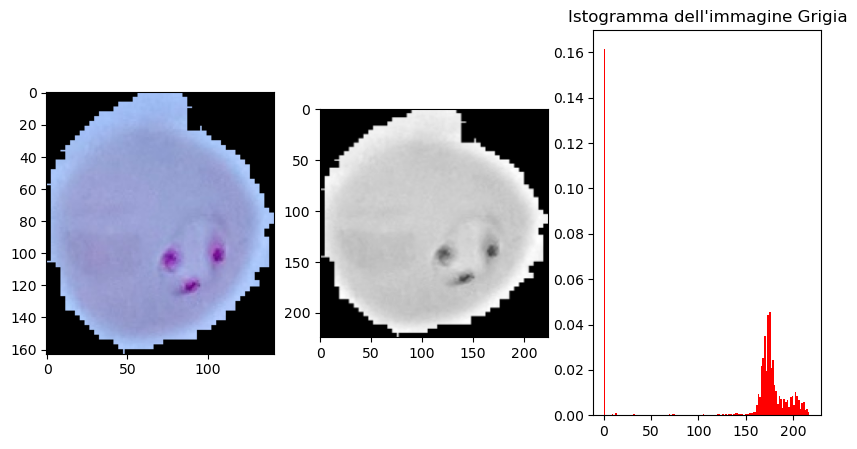

In [10]:
img = cv2.imread('FESI/Progetto/malaria/malaria/parasite (1).png', cv2.IMREAD_UNCHANGED)
resized = cv2.resize(img, (224, 224)) #ridimensionamento dell'immagine
img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) # Conversione in scala di grigi

plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(img_gray, cmap='gray')
plt.subplot(1,3,3) 
plt.hist(img_gray.ravel(), bins=128, density=True, color='r');
plt.title("Istogramma dell'immagine Grigia")
plt.show()

Prima di effettuare il miglioramento del contrasto ho creato una maschera tramite una prima sogliatura con lo scopo di rimuovere lo sfondo nero: <br>
Il valore che ho scelto di utilizzare come soglia è lo 0, in questo modo i valori dei pixel superiori a 0 (ovvero nero) vengono trasformati tramite sogliatura in pixel bianchi. <br> Così facendo creo la maschera che poi verrà applicata all'immagine originale, per rimuovere lo sfondo nero.

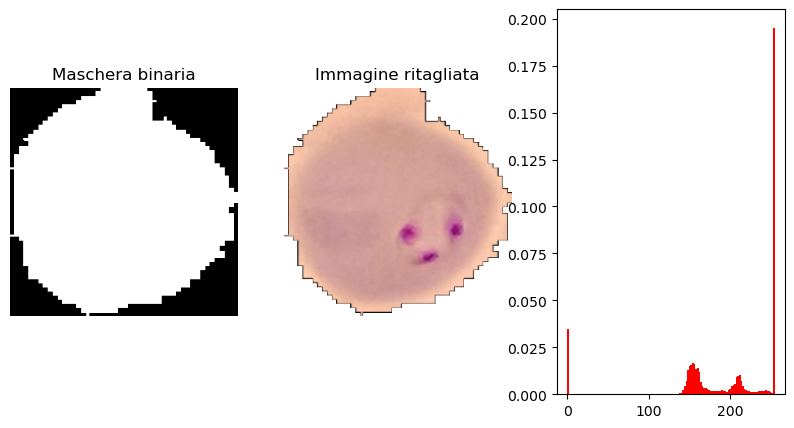

In [11]:
# Creo una maschera per rilevare il contenuto non nero
_, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)

resized_rgba = cv2.cvtColor(resized, cv2.COLOR_BGR2RGBA)
result = resized_rgba.copy()
result[mask == 0] = [255,255,255,0]   # Seleziono tutti i pixel che corrispondono a dove mask è 0 (quindi dove mask è nera) e li metto bianchi
 
#in questa immagine c'è un quarto valore dopo 255 perchè sto usando RGBA --> A è il canale alfa per la trasparenza


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(mask, cmap='gray')
plt.title("Maschera binaria")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(result)
plt.title("Immagine ritagliata")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.hist(result.ravel(), bins=128, density=True, color='r');
plt.show()

Adesso che ho rimosso lo sfondo posso procedere con il miglioramento del contrasto. Questa tecnica viene applicata sull'immagine in scala di grigi e non sull'immagine a colori qui sopra. <br>
Come è stato detto precedentemente (nella sezione del **metodo 1**), il miglioramento del contrasto permette di evidenziare alcune regioni all'interno dell'immagine, tramite una distribuzione più equa dei colori all'interno dell'istogramma. <br> Tuttavia in presenza di rumore forte questa tecnica può amplificarlo. 
Infatti questo è proprio quello che è successo nel mio caso: <br> 
L'aumento del contrasto ha si definito bene i bordi, ma siccome era presente una quantità significativa di rumore lo ha amplificato. Per risolvere avrei dovuto provare ad applicare alcune tecniche di riduzione del rumore, come un filtro gaussiano o un filtro mediano.

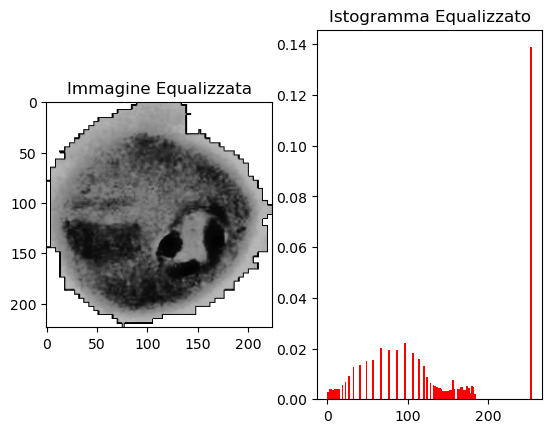

In [12]:
#Durante la conversione in scala di grigi il canale alfa (che gestisce la trasparenza) viene perso, di conseguenza lo sfondo torna al suo colore originario (io ho impostato bianco)
#Posso evitare che ciò succeda conservando il canale alfa, e riapplicandolo all'immagine convertita. 
#Tuttavia la funzione cv2.equalizeHist accetta solo immagini a un singolo canale (grayscale), di conseguenza non posso passare come argomento  un'immagine con due canali (grigio + alfa), che non perchè supportata da equalizeHist.
# Quindi effettuo prima l'equalizzazione unicamente sul canale grigio, e in seguito applico anche il canale alfa separatamente 

# Separo i quattro canali RGBA
r, g, b, alpha = cv2.split(result)

#converto l'immagine in scala di grigi + canale alfa
resultGray = cv2.cvtColor(cv2.merge((r, g, b)), cv2.COLOR_BGR2GRAY)

# Equalizzazione dell'istogramma sul canale grigio
eq_img = cv2.equalizeHist(resultGray)

# Combino il tutto con il canale alfa
bgra_gray = cv2.merge((eq_img, eq_img, eq_img, alpha))

plt.subplot(1, 2, 1)
plt.imshow(eq_img, cmap='gray')
plt.title("Immagine Equalizzata")

plt.subplot(1, 2, 2)
plt.hist(eq_img.ravel(), bins=128, density=True, color='r')
plt.title("Istogramma Equalizzato")
plt.show()

Effettuo una seconda sogliatura per ottenere la maschera con cui andare a segmentare l'immagine. Grazie all'equalizzazione dell'istogramma so di per certo che avrò bisogno di una soglia abbastanza bassa: <br> 
Infatti le regioni della malattia che ci interessano hanno un colore che si avvicina di molto al nero (0).
Dopo alcuni tentativi ho scelto come soglia il valore 8, mi sembra il valore di soglia più appropriato dal momento che se scelgo un valore più elevato funziona meglio su alcune immagini, ma non funziona su altre. <br>

Un modo per rendere più efficace l'algoritmo sarebbe trovare un modo per calcolare il valore della soglia dinamicamente, in modo tale da adattare meglio il valore a tutte le immagini. <br>

Dopo aver effettuato la sogliatura e aver quindi ottenuto la maschera procedo con un'operazione di "Opening", ovvero una operazione di erosione seguita da una dilatazione, con lo scopo di rimuovere il rumore e pulire la maschera.

- EROSIONE: Questa operazione erode i confini dell'oggetto in primo piano. Funziona creando un kernel di convoluzione e passandolo sull'immagine;  è efficace per rimuovere piccoli rumori bianchi ottenuti dopo la sogliatura

- DILATAZIONE: Questa operazione è l'esatto opposto dell'erosione --> Serve perchè l'operazione di erosione potrebbe rimpicciolire gli oggetti, di conseguenza l'operazione di dilatazione ci consente di mantenere le dimensioni degli oggetti senza alterarne il rumore.

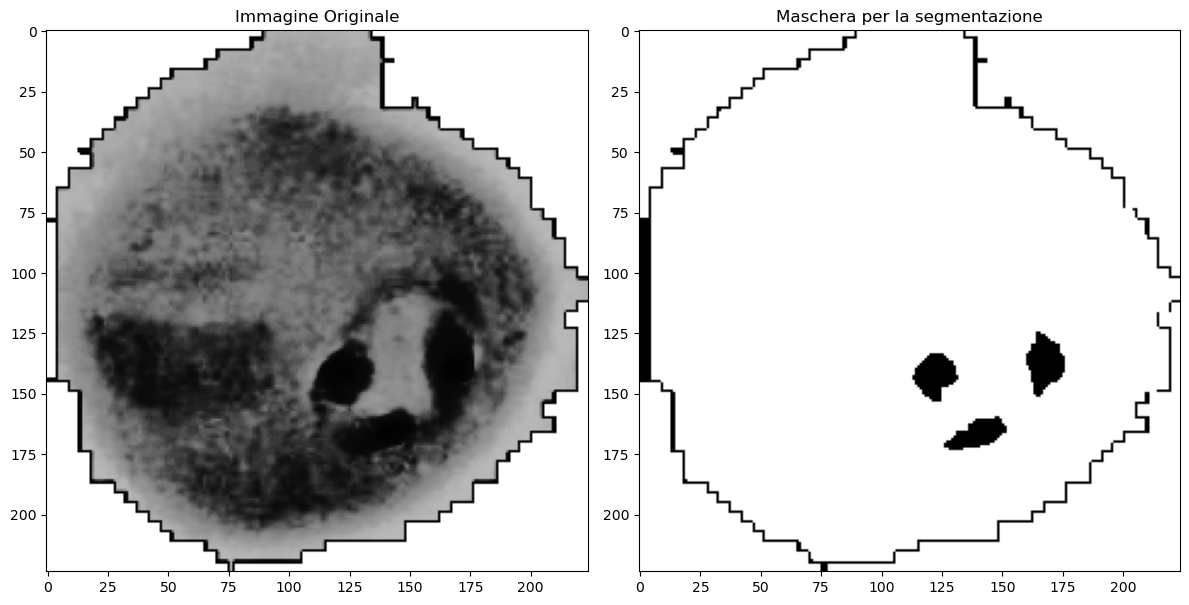

In [13]:
# Siccome non posso applicare la sogliatura sull'immagine RGBA, lavoro su un'immagine in scala di grigi e successivamente riapplico il canale alfa 
img_noRGBA = cv2.cvtColor(bgra_gray, cv2.COLOR_BGR2GRAY)

#Seconda sogliatura
_, thresh = cv2.threshold(img_noRGBA, 8, 255, cv2.THRESH_BINARY)

# Rimozione del rumore - Pulizia della maschera
kernel = np.ones((3,3), np.uint8) #creo il kernel di convoluzione --> matrice 3x3
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 2)

# Rimuovere le regioni troppo piccole
labels = measure.label(opening, connectivity=2)  
properties = measure.regionprops(labels)
min_size = 700  #Dimensione minima delle macchie da mantenere
filtered_labels = morphology.remove_small_objects(labels, min_size=min_size)
segmented = filtered_labels > 0  # Converti in maschera binaria

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Immagine Originale")
plt.imshow(img_noRGBA, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Maschera per la segmentazione")
plt.imshow(segmented, cmap="gray")

plt.tight_layout()
plt.show()

Ora che ho otttenuto la maschera pulita vado ad applicarla all'immagine originale, in modo tale da effettuare la segmentazione.

Ecco l'immagine segmentata:

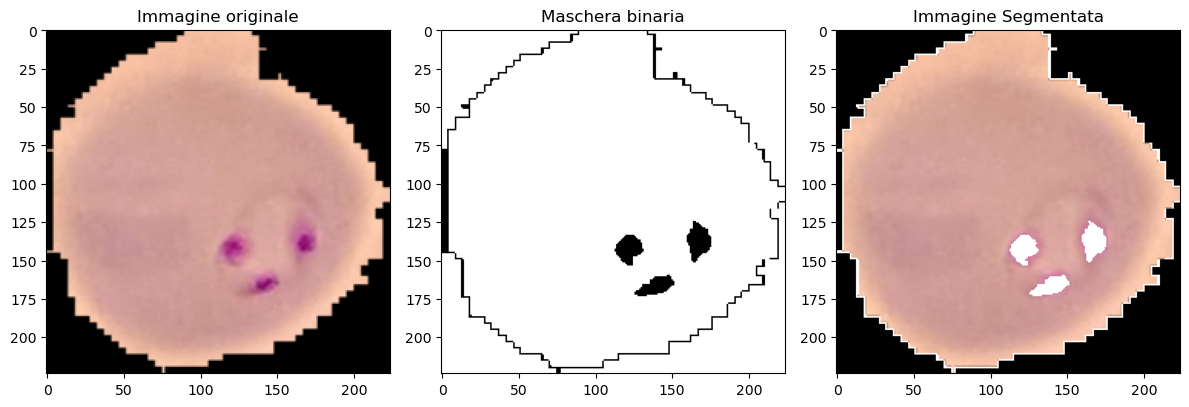

In [14]:
mask = (cv2.bitwise_not(thresh)) > 0

imgSegmented = resized.copy() #prendo una copia dell'originale sulla quale applicherò la maschera
imgSegmented[mask] = [255, 255, 255] 

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Immagine originale")
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Maschera binaria")
plt.imshow(segmented, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Immagine Segmentata")
plt.imshow(cv2.cvtColor(imgSegmented, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

### **Implementazione del Metodo 2**

Inizio, anche in questo caso, concentrantomi principalmente sulle tecniche di pre-processing che ho utilizzato in questo algoritmo: <br>
- riduzione del rumore con un filtro mediano
- riduzione del rumore con un filtro bilaterale.

Ho provato ad attuare altre tecniche come: normalizzazione dei colori o miglioramento del contrasto sui canali H e V, ma non ho ottenuto dei buoni risultati. <br> 
Quindi dopo molti tentativi ho pensato che la scelta migliore fosse sfruttare solo i filtri per una riduzione del rumore appropriata. <br>
Tramite questi due filtri riesco a ridurre in modo adeguato il rumore e conservare solo ciò che mi interessa rimuovere



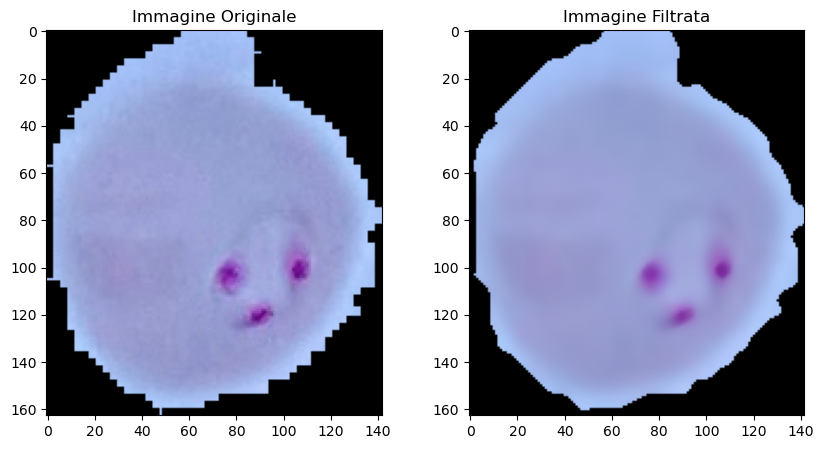

In [ ]:
image = img.copy()

# Passo 1: Riduzione del rumore con filtro mediano
image = cv2.medianBlur(image, 5)

# Passo 2: Riduzione del rumore con filtro bilaterale
# Parametri: d = diametro, sigmaColor = quanto mantengo i dettagli, sigmaSpace = raggio di influenza
image = cv2.bilateralFilter(image, d=7, sigmaColor=75, sigmaSpace=75)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Immagine Originale")
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image,)
plt.title("Immagine Filtrata")
plt.show()

Dopo aver filtrato correttamente l'immagine passo a convertila nello spazio di colore HSV, per poi stampare gli istogrammi dei valori presenti nei 3 canali H, S e V. <br>
Prima di far ciò vado a filtrare i 3 canali separatamente per rimuovere lo sfondo nero e non includerlo nell'istogramma, in questo modo posso avere una visione più chiara dell'andamento dei valori all'interno degli istogrammi, senza che siano presenti i valori dello sfondo. <br>
Posso quindi procedere a stampare gli istogrammi, molto importanti all'interno del metodo che ho implementato, perchè il valore della soglia viene calcolato dinamicamente da immagine a immagine, in base all'andamento dei valori all'interno degli istogrammi.

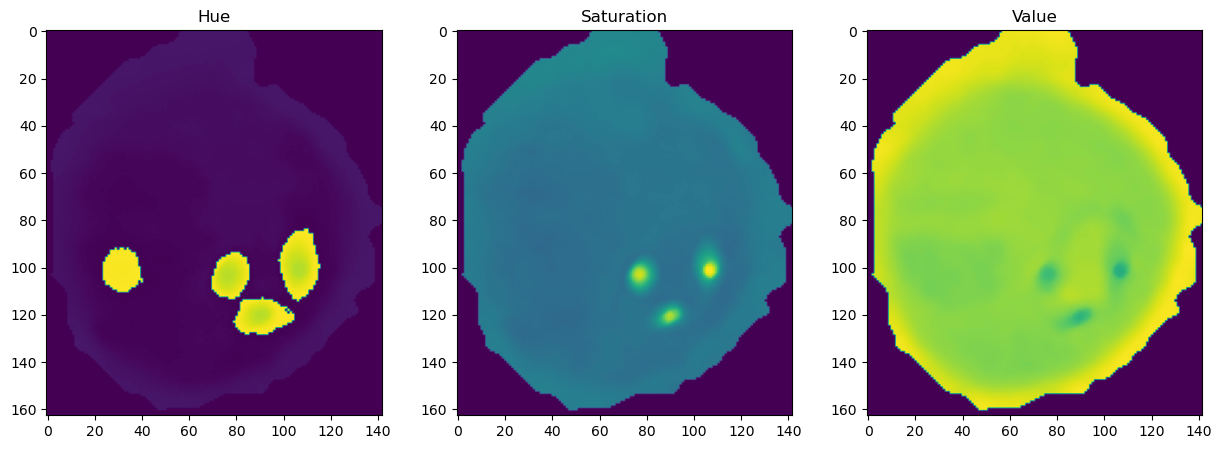

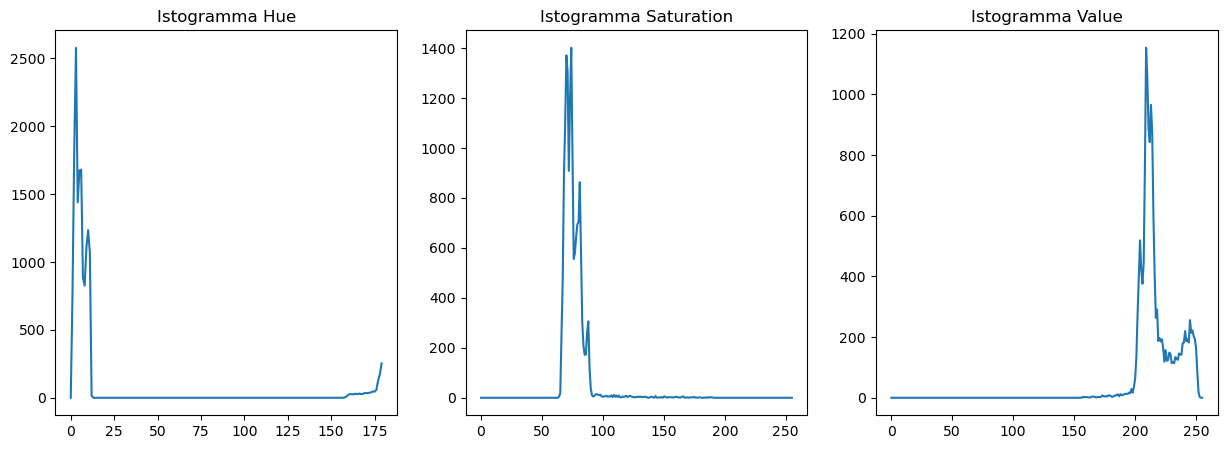

In [ ]:
# Converti l'immagine nello spazio colore HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue = hsv[:, :, 0]
saturation = hsv[:, :, 1]
value = hsv[:, :, 2]

# Creo delle maschere per filtrare lo sfondo
non_zero_saturation = hsv[:, :, 1] > 0
non_zero_hue = hsv[:, :, 0] > 0
non_zero_value = hsv[:, :, 2] > 0

# Filtra i pixel di saturazione > 0
filtered_hue = hsv[:, :, 0][non_zero_hue]
filtered_saturation = hsv[:, :, 1][non_zero_saturation]
filtered_value = hsv[:, :, 2][non_zero_value]

# Calcola gli istogrammi
hist_h = cv2.calcHist([filtered_hue], [0], None, [180], [0, 180])
hist_s = cv2.calcHist([filtered_saturation], [0], None, [256], [0, 256])
hist_v = cv2.calcHist([filtered_value], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(hue),plt.title('Hue')
plt.subplot(1, 3, 2), plt.imshow(saturation), plt.title('Saturation')
plt.subplot(1, 3, 3), plt.imshow(value), plt.title('Value')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.plot(hist_h), plt.title('Istogramma Hue')
plt.subplot(1, 3, 2), plt.plot(hist_s), plt.title('Istogramma Saturation')
plt.subplot(1, 3, 3), plt.plot(hist_v), plt.title('Istogramma Value')
plt.show()


Adesso si rientra nei passaggi chiave dell'algoritmo. <br>
Lo scopo di quest'ultimo è appunto rimuovere i valori che posseggono una tonalità (Hue) che varia dai 120 ai 185 --> questi valori rappresentano le diverse tonalità di viola (infatti possiamo notare come la frequenza di questi valori nella prima immagine sia molto bassa). <br>

La problematica principale è capire il range minimo dei valori di saturazione che vogliamo rimuovere. Inoltre non possiamo usare una soglia minima fissa perchè vi sono immagini che presentano un livello di saturazione generale più alto (immagini più accese), e altre che possiedono un livello di saturazione generale più basso, di conseguenza non funzionerebbe. <br>
L'idea per il calcolo di un valore adeguato di saturazione mi è venuta osservando la variazione del grafico da immagine a immagine: <br>
Le immagini dove la dispersione/distribuzione media dei valori di saturazione è alta possiedono un istogramma con valori, per l'appunto, molto più distribuiti, mentre le immagini con valori di saturazione molto meno distribuiti (come quella che stiamo analizzando) solitamente presentano un istogramma che ha una forma molto riconducibile ad un picco. <br> Quindi la mia idea è stata calcolare un valore dinamico di saturazione minima basandomi proprio sulla distribuzione dei valori all'interno dell'istogramma. <br>

Per raggiungere questo fine effettuo il calcolo della deviazione standard(o varianza), quest'ultima infatti misura la variabilità dei valori all'interno di un grafico. Per effettuarne il calcolo ho sfruttato la funzione np.std(). <br>

Dopo averla calcolata sfrutto la deviazione standard per capire come trattare l'immagine:
- Se ho un istogramma della saturazione con valori poco distribuiti (deviazione standard <20) allora prendo il valore più frequente e gli aggiungo un margine
- Se invece l'istogramma possiede dei valori molto distribuiti, allora calcolo il valore di saturazione in base alla media dei valori presenti, sommata alla distribuzione stessa.  

Da tutte queste operazioni ottengo un valore di saturazione, che userò come limite quando vado a creare la maschera: <br>
Le tonalità più chiare in assoluto che voglio rimuovere sono --> [120, (valore calcolato di saturazione), 70] --> dove 120 è il valore minimo di Hue (valore di tonalità più bassa di viola), mentre 70 è il valore minimo di value <br>
Le tonalità più scure in assoluto che voglio rimuovere sono --> [185, 255, 255] 


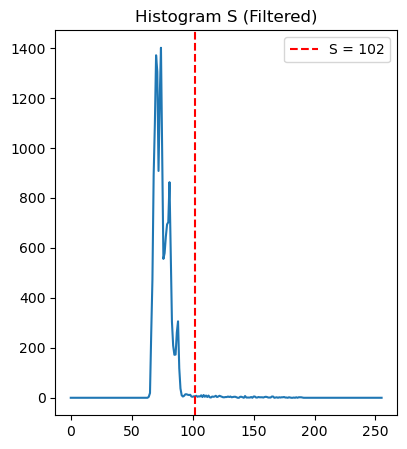

In [ ]:
# Calcola metriche per l'analisi della distribuzione
saturationAvg = np.mean(filtered_saturation[filtered_saturation > 0])  # Saturazione media (escludendo sfondo)
devStandard = np.std(filtered_saturation[filtered_saturation > 0])    # Deviazione standard
saturationMostFrequent = np.argmax(hist_s)                   # Moda (valore più frequente)

# Condizioni basate sull'analisi della distribuzione
if devStandard < 20:  # Distribuzione stretta
    sMin = min(255, saturationMostFrequent + 20)
else:  # Distribuzione ampia
    sMin = min(255, int(saturationAvg + devStandard))
    
sMin = sMin + 8 # Aggiungi un margine di sicurezz

# Imposto i limiti HSV per la segmentazione
lower_purple = np.array([120, sMin, 70])  # Limite inferiore (Hue, Saturation, Value)
upper_purple = np.array([185, 255, 255])  # Limite superiore

# Visualizzo l'istogramma della saturazione e il valore di saturazione 
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.plot(hist_s), plt.title('Histogram S (Filtered)')
plt.axvline(sMin, color='r', linestyle='--', label=f'S = {sMin}')
plt.legend()
plt.show()

Ora che ho definito i margini sfrutto questo valore per creare una maschera. <br>
Utilizzo la funzione cv2.inRange --> mi permette di creare una maschera binaria, i pixel all'interno dell'intervallo specificato sono bianchi, mentre i valori fuori dall'intervallo diventano neri. <br>
In questo modo creo la maschera, tuttavia prima di applicarla all'originale effettuo alcune operazioni che mi permettono di pulirla, in modo tale da rimuovere il rumore.<br>
A differenza dell'algoritmo precedente, in questo caso sfrutto solo operazioni di erosione per rimuovere alcune parti; non applico dilatazione ne rimuovo le aree piccole. <br> 

Ho preferito fare così perchè ho notato che rimuovendo le aree piccole l'algoritmo risultava meno preciso, mentre le operazioni di dilatazione andavano in conflitto con l'output finale, quindi ho preferito rimuoverle.

Dopo aver pulito la maschera posso procedere con l'applicazione effettiva sull'immagine originale, e di conseguenza a concludere il mio algoritmo.

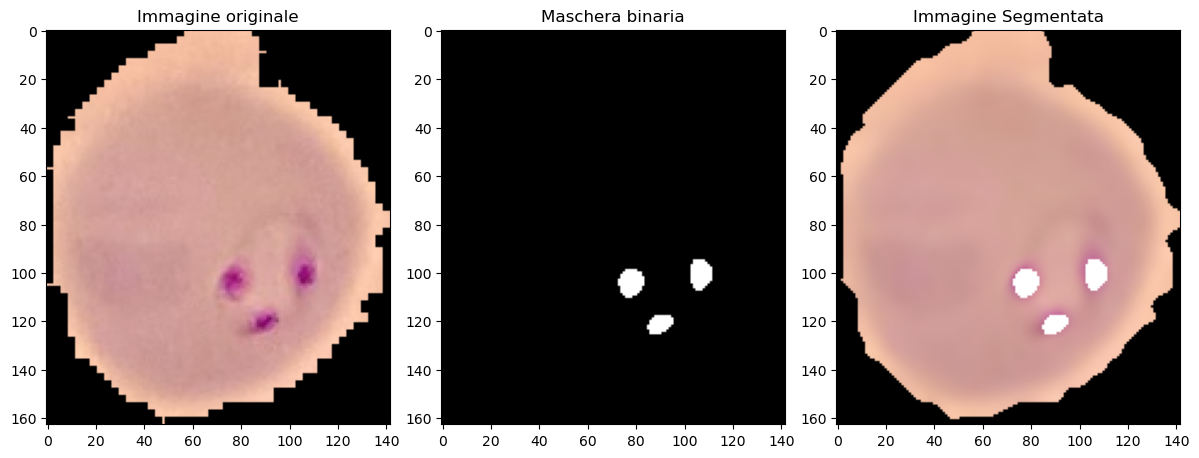

In [ ]:
# Crea una maschera per isolare le aree viola
mask = cv2.inRange(hsv, lower_purple, upper_purple)

# Post-processing: Morfologia
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Rimuovi le macchie viola dall'immagine
image[mask > 0] = [255, 255, 255]

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Immagine originale")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Maschera binaria")
plt.imshow(mask, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Immagine Segmentata")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()
   

Queta è l'immagine segmentata. <br>

## APPROFONDIMENTI - Considerazioni finali

#### Perchè il secondo metodo? 

Questi sono i due metodi che ho utilizzato per segmentare correttamente le immagini. 

Dopo aver implementato il primo algoritmo ho notato che non era molto preciso su alcune immagini, nel cercare una soluzione ho "giocato" un po' con il valore della sogliatura, notando che modificandolo funzionava meglio per alcune immagini, ma peggio per altre. <br>
Ho quindi deciso di mantenere il valore della sogliatura iniziale a 8, ovvero un valore abbastanza basso che potesse funzionare per la maggior parte delle immagini, ed essere quindi un buon compromesso. <br>

Siccome non ero totalmente soddisfatto dei risultati ottenuti dal primo algoritmo ho cercato di migliorarmi implementandone un secondo che funzionasse in modo molto più preciso rispetto al primo <br>
Come prima scelta ho deciso di cambiare spazio di colore in cui effettuare la mia analisi, quindi di non sfruttare più una scala di grigi, ne RGB. <br>
Questo perchè RGB non è uno spazio di colore adatto alla segmentazione. Infatti i colori vengono rappresentati come una combinazione di canali *interdipendenti* , quindi la modifica di un singolo canale va a modificare di molto anche la percezione degli altri due. Ad esempio, una variazione nella luminosità può influenzare sia il rosso che il verde e il blu, rendendo difficile separare le informazioni relative al colore da quelle relative all'illuminazione. Inoltre lo spazio RGB non è progettato per rappresentare in modo accurato la percezione umana del colore. Ad esempio, due colori che sembrano molto simili all'occhio umano possono avere valori RGB molto diversi. Ovviamente è comunque possibile effettuare una buona segmentazione, anche in RGB, ma se vogliamo facilitare e rendere più efficente la segmentazione conviene spostarci in degli spazi di colore a componente indipendente: ovvero che separano le informazioni sul colore da quelle sulla luminosità e sulla saturazione. Alcuni esempi possono essere HSV, HSL o LAB.

Personalmente ho scelto di lavorare nello spazio di colore HSV.

#### Cos'è HSV?

HSV (Hue, Saturation, Value) è uno spazio di colore che rappresenta i colori in 3 canali differenti:
- tonalità (Hue) 
- saturazione (Saturation) 
- valore (Value) <br>

è uno degli spazi di colori più utilizzati per la segmentazione: <br>
Questo perchè permette di separare le informazioni sulla tonalità del colore (canale Hue), da quelle sull'intensità (canale Value) e mantenere anche la saturazione (quindi quanto è acceso un colore) su un canale separato. <br>
In questo modo diventa molto più semplice andare a lavorare solo sulle singole componenti. <br>
Infatti, nel mio caso, una volta individuata la tonalità di viola da rimuovere, mi è bastato andare a lavorare unicamente sulla componente di saturazione. <br>
Una volta trovati i valori adeguati ho costriuto una maschera sfruttando quest'ultimi, senza sfruttare sogliature esterne ne altre metodologie.

#### Alcune considerazioni sui due metodi

Entrambi i metodi sembrano funzionare correttamente: <br>
- Il primo metodo è basato su una sogliatura lavorando in scala di grigi. Il punto forte di questo metodo è il fatto che potenzialmente può funzionare per "qualsiasi dataset". <br>
  L'unica pecca della mia implementazione è il fatto che la sogliatura purtroppo non è dinamica, quindi io ho dovuto scegliere un valore che si adeguasse al dataset, andando a perdere molto sopratutto sulla precisione; ma se riuscissi a rimuovere un po' il rumore e a trovare una metodologia che mi permetta di calcolare la soglia in modo dinamico, allora questo algoritmo potrebbe essere quasi sempre applicabile, ovviamente con le sue eccezioni.

- Il secondo metodo invece è molto più preciso, perchè sfrutta i valori HSV delle immagini per rimuovere soltanto le porzioni della malattia interessate. Inoltre ho trovato un modo per calcolare una saturazione minima che vari da immagine a immagine, quindi sfrutto un valore minimo molto più preciso. Tuttavia una pecca di questa metodologia è che può funzionare unicamente per dataset dove il colore della malattia si avvicina di molto al viola. Proprio perchè non vado ad effettuare sogliatura, ma prendo i valori HSV e li uso per costruire una maschera.  

Quindi se io volessi fare un confronto posso affermare che: per questo dataset di immagini il secondo algoritmo mi sembra più preciso generalmente, ma non su tutte le immagini. Inoltre se io volessi estenderne l'utilizzo su un altro dataset, oppure aggiungessi a questo delle immagini dove il colore della malattia si discosta di molto dai valori HSV da me scelti, allora questo metodo non funzionerebbe; mentre il primo algoritmo potrebbe funzionare, se scegliessi un valore di soglia appropriato.

Ecco alcuni esempi sui due algoritmi a confronto, se si volesse vedere il risultato su tutte le immagini del dataset ecco il link alle cartelle: --> [LINK]()

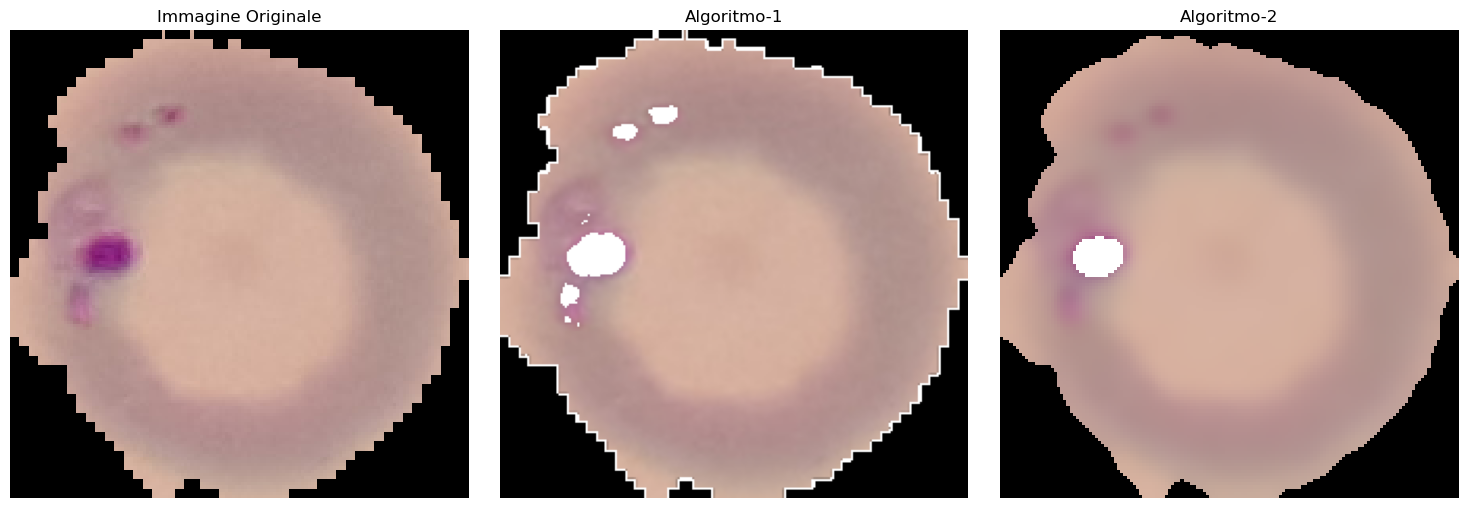

In [ ]:
img = cv2.imread('FESI/Progetto/malaria/malaria/parasite (28).png', cv2.IMREAD_UNCHANGED)
sol2 = cv2.imread('FESI/Progetto/malaria/output/parasite (28).png', cv2.IMREAD_UNCHANGED)
sol1 = cv2.imread('FESI/Progetto/malaria/output_Metodo1/parasite (28).png', cv2.IMREAD_UNCHANGED)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.title("Immagine Originale"), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 3, 2), plt.title("Algoritmo-1"),plt.imshow(cv2.cvtColor(sol1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 3, 3), plt.title("Algoritmo-2"), plt.imshow(cv2.cvtColor(sol2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.tight_layout()
plt.show()

Ho voluto mettere in evidenza questo primo esempio perchè è uno dei casi dove il primo algoritmo è più preciso del secondo. <br>
Quelle macchie sfocate non si capisce se siano parte della malattia, oppure siano degli artefatti. Come abbiamo visto il primo algoritmo va ad aumentare la presenza del rumore, in alcuni casi (a causa dell'equalizzazione dell'istogramma), quindi queste macchie vengono enfatizzate e incluse all'interno della sogliatura.

In questo caso ne si trae beneficio, tuttavia vi sono delle situazioni in cui questa caratteristica porta all'eliminazione di parti della cellula che non dovrebbero essere rimosse (esempio successivo):

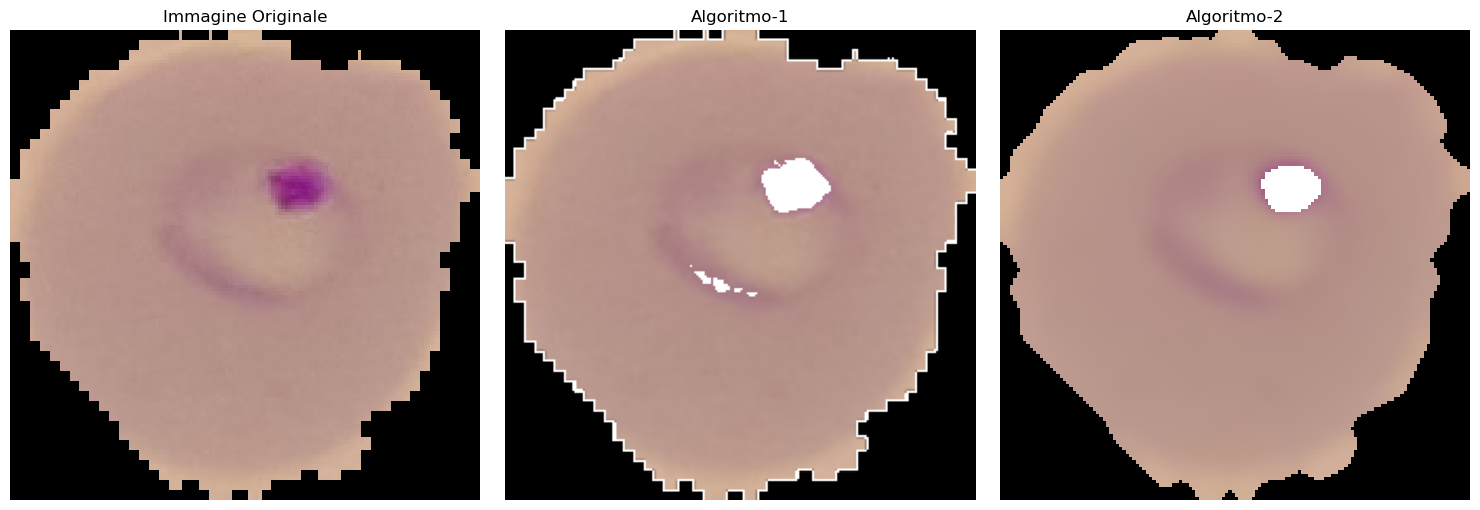

In [ ]:
img = cv2.imread('FESI/Progetto/malaria/malaria/parasite (54).png', cv2.IMREAD_UNCHANGED)
sol1 = cv2.imread('FESI/Progetto/malaria/output_Metodo1/parasite (54).png', cv2.IMREAD_UNCHANGED)
sol2 = cv2.imread('FESI/Progetto/malaria/output/parasite (54).png', cv2.IMREAD_UNCHANGED)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.title("Immagine Originale"), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 3, 2), plt.title("Algoritmo-1"),plt.imshow(cv2.cvtColor(sol1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 3, 3), plt.title("Algoritmo-2"), plt.imshow(cv2.cvtColor(sol2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.tight_layout()
plt.show()

Notiamo come in questo secondo esperimento il primo algoritmo abbia rimosso una parte che, almeno personalmente, non mi sembra appartenga alla malattia, ma bensì siano degli artefatti (come dello sporco) presenti al momento dell'analisi. <br>
Osserviamo quindi come in questo caso enfatizzare il rumore ha portato a rimuovere zone della cellula che non andrebbero rimosse

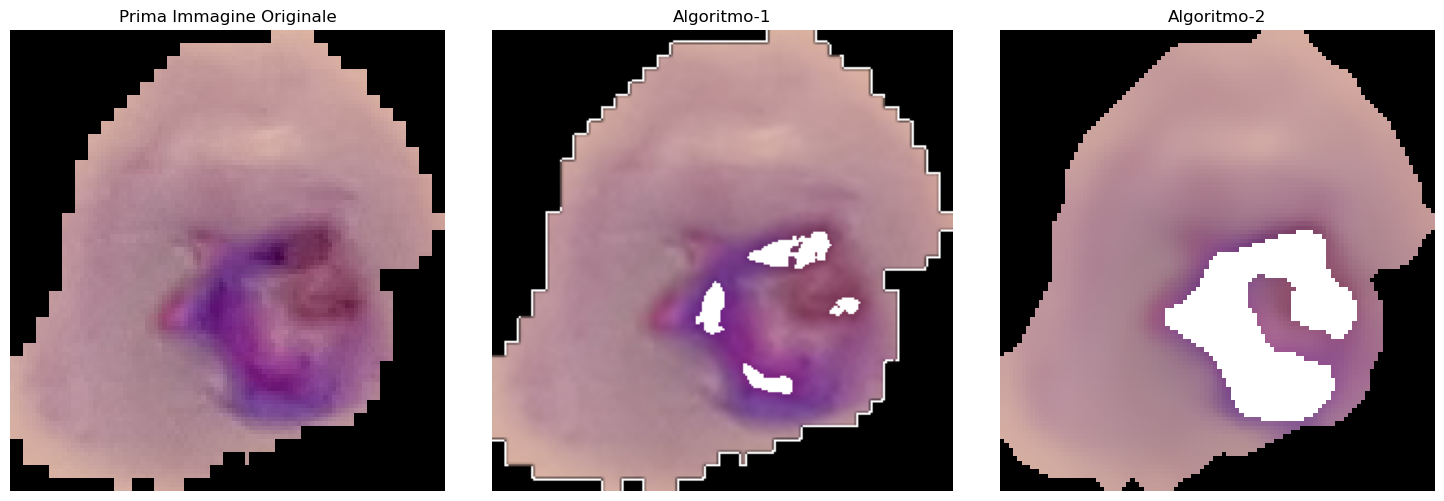

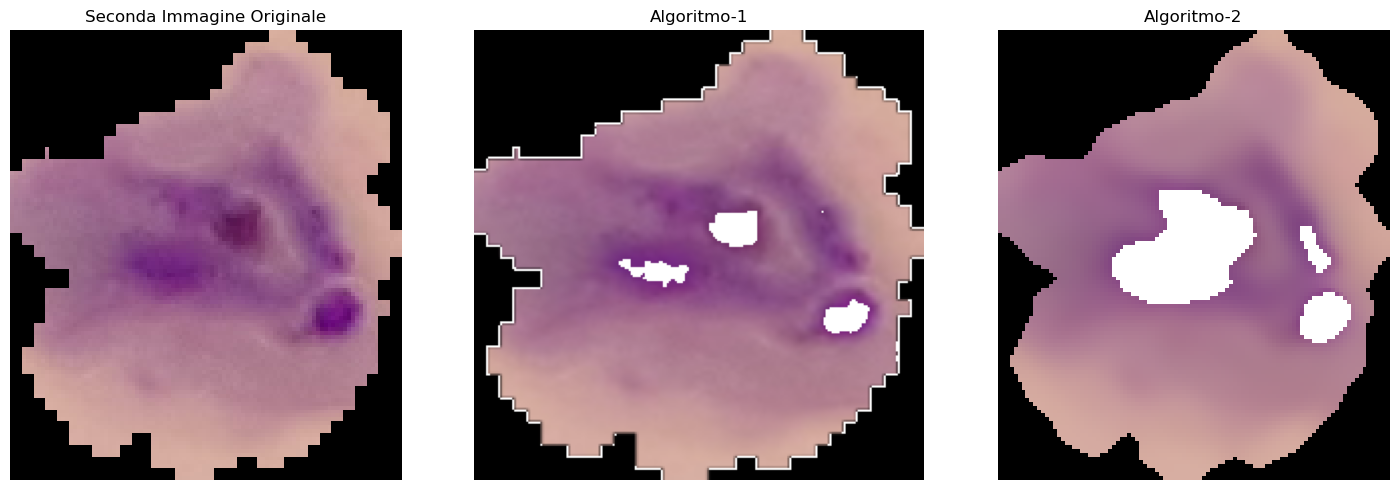

In [ ]:
img1 = cv2.imread('FESI/Progetto/malaria/malaria/parasite (24).png', cv2.IMREAD_UNCHANGED)
sol1_1 = cv2.imread('FESI/Progetto/malaria/output_Metodo1/parasite (24).png', cv2.IMREAD_UNCHANGED)
sol2_1 = cv2.imread('FESI/Progetto/malaria/output/parasite (24).png', cv2.IMREAD_UNCHANGED)

img2 = cv2.imread('FESI/Progetto/malaria/malaria/parasite (26).png', cv2.IMREAD_UNCHANGED)
sol1_2 = cv2.imread('FESI/Progetto/malaria/output_Metodo1/parasite (26).png', cv2.IMREAD_UNCHANGED)
sol2_2 = cv2.imread('FESI/Progetto/malaria/output/parasite (26).png', cv2.IMREAD_UNCHANGED)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.title("Prima Immagine Originale"), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 3, 2), plt.title("Algoritmo-1"),plt.imshow(cv2.cvtColor(sol1_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 3, 3), plt.title("Algoritmo-2"), plt.imshow(cv2.cvtColor(sol2_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.title("Seconda Immagine Originale"), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 3, 2), plt.title("Algoritmo-1"),plt.imshow(cv2.cvtColor(sol1_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 3, 3), plt.title("Algoritmo-2"), plt.imshow(cv2.cvtColor(sol2_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.tight_layout()
plt.show()

(terzo esempio) Queste immagini sono molto complesse da valutare, dipende quali sezioni fanno parte o meno della malattia. in generale penso che il lavoro migliore venga svolto dal secondo algoritmo, in questo caso.

Ho preso quelli che secondo me erano i confronti più interessanti da vedere tra i due algoritmi. Se si vogliono vedere i risultati su tutte le altre cellule del dataset controllare questo [LINK](https://drive.google.com/drive/folders/1NobknpSX9yD7Sndq0Q3v3JsxRhD7hHXA?usp=sharing):
- la cartella output --> contiene i risultati del secondo algoritmo
- la cartella output_Metodo1 --> contiene i risultati del primo algoritmo

#### **Considerazioni sul valore di soglia e saturazione minima**



Precedentemente ho messo in evidenza il fatto che: una delle problematiche principali del primo algoritmo è il fatto che la soglia scelta è fissa, e non venga calcolata in modo dinamico. <br>
Ma cosa succede se modifico il valore di soglia?

Dal punto di vista teorico, se uso una soglia di 20 e non di 8 vuol dire che tutti i pixel con un valore maggiore di 20 vengono impostati a bianco, mentre i restanti (ovvero quelli con un valore minore di 20) vengono impostati a nero. <br>

Come si traduce quest'aspetto nel nostro caso? Andiamo a vedere la differenza:

(-0.5, 223.5, 223.5, -0.5)

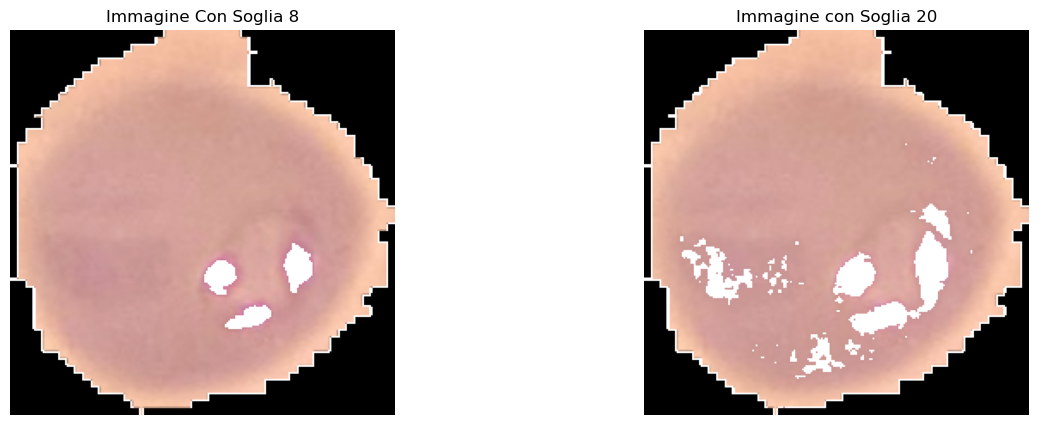

In [ ]:
img = cv2.imread('FESI/Progetto/malaria/output_Metodo1/parasite (1).png', cv2.IMREAD_UNCHANGED)
img_soglia20 = cv2.imread('FESI/Progetto/Immagine_ConSoglia20.png', cv2.IMREAD_UNCHANGED)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1), plt.title("Immagine Con Soglia 8"), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 2, 2), plt.title("Immagine con Soglia 20"),plt.imshow(cv2.cvtColor(img_soglia20, cv2.COLOR_BGR2RGB))
plt.axis("off")

Come possiamo notare un aumento della soglia ha fatto si che venisse rimossa una regione maggiore dell'immagine. Questo è ovviamente un aspetto negativo, se però consideriamo solo questa immagine. <br>
Andiamo ad analizzare una seconda immagine:

(-0.5, 223.5, 223.5, -0.5)

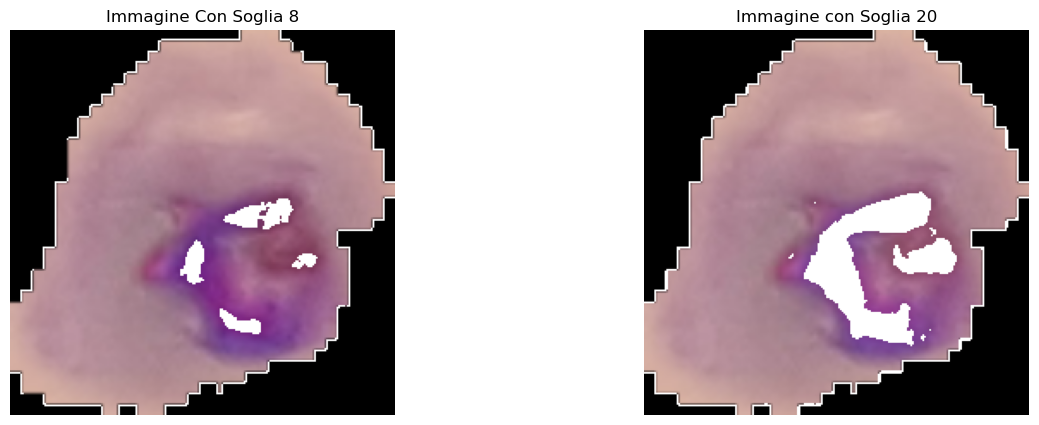

In [ ]:
img = cv2.imread('FESI/Progetto/malaria/output_Metodo1/parasite (24).png', cv2.IMREAD_UNCHANGED)
img_soglia20 = cv2.imread('FESI/Progetto/img24_s20.png', cv2.IMREAD_UNCHANGED)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1), plt.title("Immagine Con Soglia 8"), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 2, 2), plt.title("Immagine con Soglia 20"),plt.imshow(cv2.cvtColor(img_soglia20, cv2.COLOR_BGR2RGB))
plt.axis("off")

Come possiamo notare in questo secondo caso modificare la soglia ha portato ad incrementare la precisione dell'algoritmo, rimuovendo una maggiore sezione della malattia. <br>
Quindi lo stesso valore di soglia può, ovviamente, essere adatto ad alcune immagini, ma non ad altre, ecco perchè sarebbe ottimale se al posto di sfruttare un valore di soglia fisso, quest'ultimo verrebbe calcolato dinamicamente.

Un comportamento simile può anche essere osservato nel secondo algoritmo, sommando una costante al valore di saturazione che ho calcolato.<br>
Osserviamo per esempio che succede se sommo 10 al valore di saturazione:

(-0.5, 207.5, 180.5, -0.5)

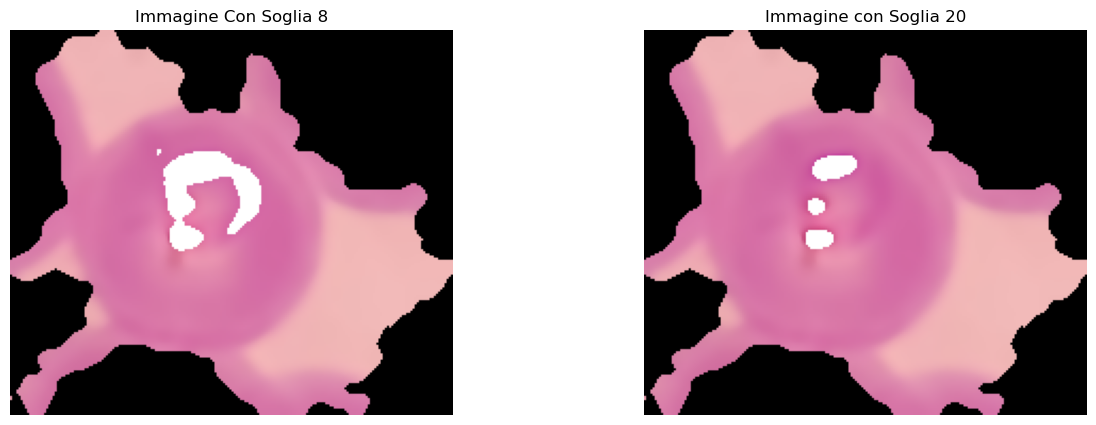

In [ ]:
img = cv2.imread('FESI/Progetto/malaria/output/parasite (104).png', cv2.IMREAD_UNCHANGED)
img_somma10 = cv2.imread('FESI/Progetto/metododue_plus10.png', cv2.IMREAD_UNCHANGED)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1), plt.title("Immagine Con Soglia 8"), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 2, 2), plt.title("Immagine con Soglia 20"),plt.imshow(cv2.cvtColor(img_somma10, cv2.COLOR_BGR2RGB))
plt.axis("off")

Anche in questo caso ottengo un risultato più preciso per quest'immagine, ma andrei a penalizzarne altre. <br>
Tuttavia, a differenza del caso precedente, in questo caso la soglia viene calcolata dinamicamente, infatti le immagini che presentano un comportamento simile sono molto poche.